# **МЛ. Контест 1.**

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Подготовка данных

Загрузим файл "train.csv" с обучающей выборкой.

In [64]:
x_train = pd.read_csv("train.csv")
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

### Обработка пропусков и дубликатов

Удалим пропуски и дубликаты.

In [65]:
x_train.dropna(how='any', inplace=True)
x_train = x_train.drop_duplicates(keep='last')

### Обработка выбросов

Простроим график для столбца RiskScore.

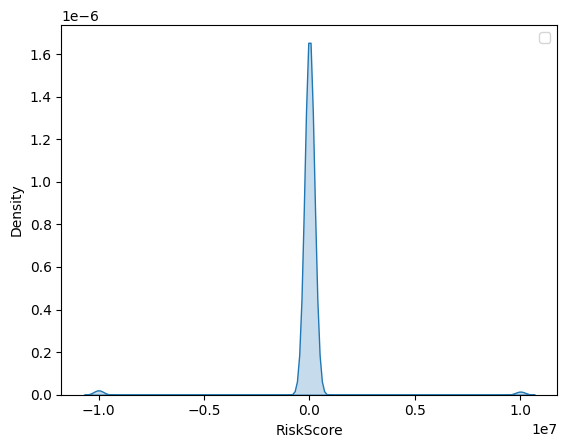

In [66]:
sns.kdeplot(x_train["RiskScore"], fill=True)
plt.legend()
plt.show()

Легко заметить, что у нас есть выбросы в районе +/-1e7. Сделаем фильрацию и построим новый график (в пределах 1e6).

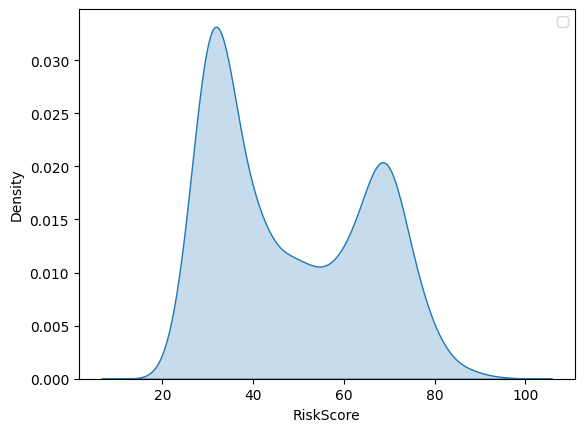

In [67]:
x_train = x_train.loc[abs(x_train['RiskScore']) < 1000000]
sns.kdeplot(x_train["RiskScore"], fill=True)
plt.legend()
plt.show()

Теперь разделим датасет на признаки (x_train) и таргет (y_train).

In [68]:
y_train = x_train.pop("RiskScore")

### Обработка категориальных признаков

Столбец с датой (ApplicationDate), исходя из человеческой логики, не имеет значения. Не важно, когда человек взял кредит, а важно, какой человек взял кредит (какой у него характер, сколько у него денег, дорожит ли он жизнью и т. д.). Поэтому просто удалим этот столбец.

In [69]:
x_train.pop("ApplicationDate")
x_train

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,0.151985,...,4.0,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0
1,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,0.175693,...,2.0,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0
2,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,0.444605,...,3.0,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0
3,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,0.188452,...,3.0,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0
4,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,0.273431,...,5.0,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11010,47.0,88686.0,648.0,5472.0,12.0,Divorced,2.0,Rent,98.0,0.112650,...,4.0,Employed,Bachelor,23.0,121698.0,0.156472,0.164928,497.756143,0.080611,1.0
11011,39.0,300000.0,850.0,7721.0,72.0,Divorced,5.0,Own,276.0,0.215136,...,2.0,Employed,Associate,16.0,18607.0,0.107721,0.108596,146.407421,0.016896,1.0
11012,57.0,300000.0,850.0,14756.0,48.0,Married,2.0,Own,620.0,0.477742,...,4.0,Employed,Associate,38.0,167544.0,0.094756,0.106387,378.792448,0.039952,1.0
11013,28.0,15000.0,300.0,51361.0,96.0,Single,1.0,Own,696.0,0.322554,...,3.0,Employed,Bachelor,5.0,116879.0,0.446361,0.401087,1793.042130,1.991234,0.0


Столбцы MaritalStatus, HomeOwnershipStatus, EmploymentStatus, EducationLevel, LoanPurpose содержат текстовые данные. При этом возможных вариантов заполнения каждого из этих столбцов не так уж много (3-5), поэтому используем One Hot encoding для каждого их этих столбцов. Столбец с пропусками просто удалим.

In [70]:
x_train = pd.get_dummies(x_train, columns=['MaritalStatus', 'HomeOwnershipStatus',
                                           'EmploymentStatus', 'EducationLevel',
                                           'LoanPurpose'], drop_first=True)
x_train

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,27.0,66829.0,549.0,17290.0,60.0,1.0,1095.0,0.151985,2.0,1.0,...,False,False,False,False,False,False,False,True,False,False
1,55.0,172147.0,850.0,16110.0,36.0,1.0,211.0,0.175693,3.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2,51.0,300000.0,850.0,38436.0,36.0,0.0,546.0,0.444605,3.0,0.0,...,False,False,True,False,False,False,False,True,False,False
3,25.0,34683.0,847.0,19186.0,48.0,0.0,153.0,0.188452,7.0,0.0,...,False,False,False,False,True,False,True,False,False,False
4,55.0,300000.0,850.0,30437.0,48.0,2.0,562.0,0.273431,3.0,1.0,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11010,47.0,88686.0,648.0,5472.0,12.0,2.0,98.0,0.112650,8.0,1.0,...,False,False,True,False,False,False,False,False,True,False
11011,39.0,300000.0,850.0,7721.0,72.0,5.0,276.0,0.215136,2.0,1.0,...,False,False,False,False,False,False,False,False,True,False
11012,57.0,300000.0,850.0,14756.0,48.0,2.0,620.0,0.477742,1.0,3.0,...,False,False,False,False,False,False,False,True,False,False
11013,28.0,15000.0,300.0,51361.0,96.0,1.0,696.0,0.322554,2.0,0.0,...,False,False,True,False,False,False,False,False,True,False


### Обработка линейной зависимости признаков

Построим корреляционную матрицу.

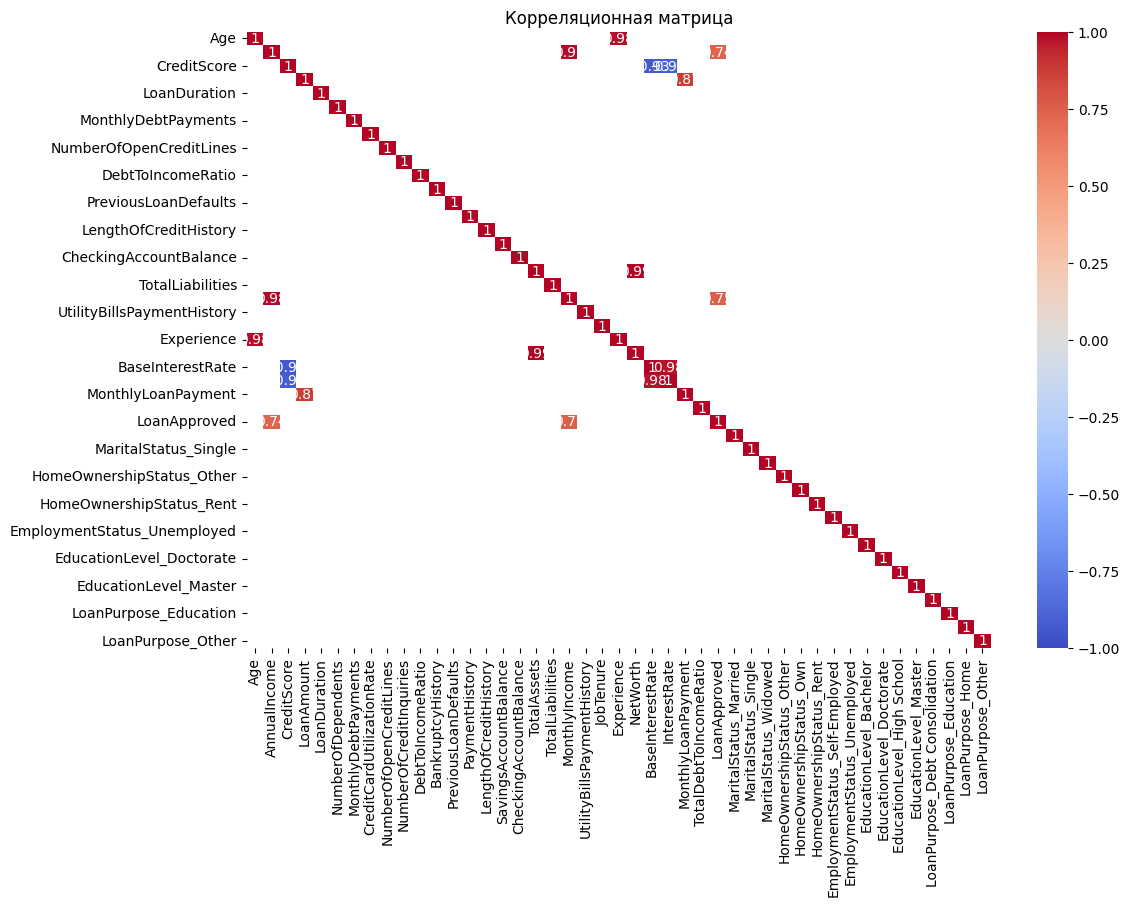

In [71]:
corr_matrix = x_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[corr_matrix.abs() >= 0.7], annot=True,  cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()

Удалим столбцы с высоким коэффициентом корреляции.

In [72]:
x_train = x_train.drop(["NetWorth", "Experience", "MonthlyLoanPayment",
                        "InterestRate", "AnnualIncome", "BaseInterestRate"], axis=1)

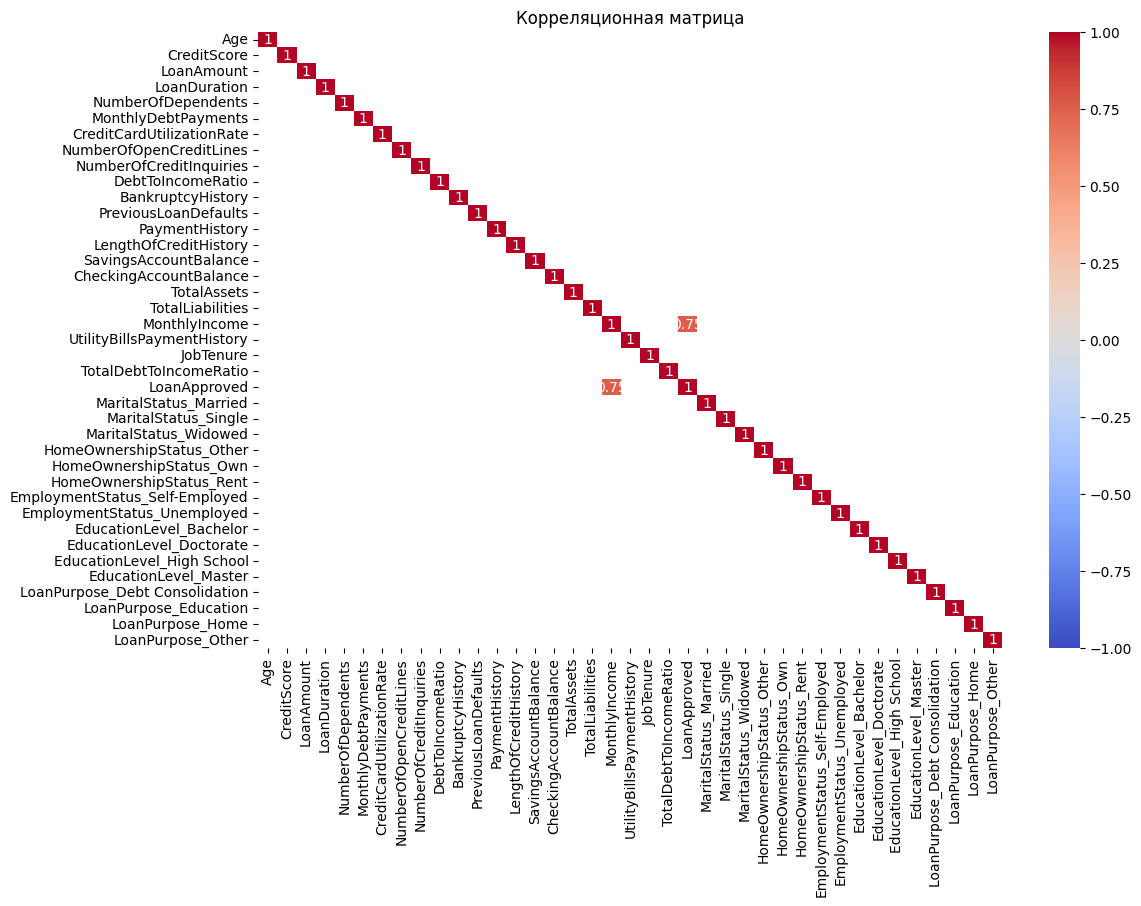

In [73]:
corr_matrix = x_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[corr_matrix.abs() >= 0.7], annot=True,  cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()

(опытным путем было получено, что столбец MonthlyIncome лучше не удалять)

### Нормализация

Используем Z-score нормализацию для данных.

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_train

,Age,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,...,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,-1.111860,-0.736675,-0.458262,0.271045,-0.399683,1.088754,-0.834293,-0.592693,0.020501,-0.564190,...,-0.322065,-0.206313,-0.646546,-0.185366,-0.821098,-0.27968,-0.570916,2.286841,-0.650214,-0.322065
1,1.305009,0.981312,-0.501464,-0.712006,-0.399683,-0.667339,-0.685576,-0.017923,-0.991767,-0.750923,...,-0.322065,-0.206313,-0.646546,-0.185366,1.217882,-0.27968,-0.570916,-0.437285,1.537956,-0.322065
2,0.959742,0.981312,0.315946,-0.712006,-1.105025,-0.001851,1.001318,-0.017923,-0.991767,-1.515888,...,-0.322065,-0.206313,1.546681,-0.185366,-0.821098,-0.27968,-0.570916,2.286841,-0.650214,-0.322065
3,-1.284494,0.964189,-0.388844,-0.220481,-1.105025,-0.782558,-0.605538,2.281157,-0.991767,0.897726,...,-0.322065,-0.206313,-0.646546,-0.185366,1.217882,-0.27968,1.751572,-0.437285,-0.650214,-0.322065
4,1.305009,0.981312,0.023083,-0.220481,0.305658,0.029933,-0.072460,-0.017923,0.020501,-1.255248,...,-0.322065,-0.206313,1.546681,-0.185366,-0.821098,-0.27968,1.751572,-0.437285,-0.650214,-0.322065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9327,0.614475,-0.171623,-0.890948,-1.695056,0.305658,-0.891817,-1.081045,2.855927,0.020501,0.427166,...,-0.322065,-0.206313,1.546681,-0.185366,-0.821098,-0.27968,-0.570916,-0.437285,1.537956,-0.322065
9328,-0.076059,0.981312,-0.808607,0.762570,2.421682,-0.538215,-0.438144,-0.592693,0.020501,-0.582721,...,-0.322065,-0.206313,-0.646546,-0.185366,-0.821098,-0.27968,-0.570916,-0.437285,1.537956,-0.322065
9329,1.477643,0.981312,-0.551038,-0.220481,0.305658,0.145152,1.209186,-1.167463,2.045038,-0.660101,...,-0.322065,-0.206313,-0.646546,-0.185366,-0.821098,-0.27968,-0.570916,2.286841,-0.650214,-0.322065
9330,-1.025543,-2.157867,0.789162,1.745620,-0.399683,0.296128,0.235686,-0.592693,-0.991767,-0.517206,...,-0.322065,-0.206313,1.546681,-0.185366,-0.821098,-0.27968,-0.570916,-0.437285,1.537956,-0.322065


## Обучение модели

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [77]:
sk_reg = LinearRegression().fit(x_train, y_train)
train_predictions = sk_reg.predict(x_train)
mean_squared_error(y_train, train_predictions)

19.064215496232798

## Предсказание на тестовой выборке

Загрузим файл с тестовой выборкой признаков (x_test).

In [81]:
x_test = pd.read_csv("test.csv")

Обработаем тестовую выборку так же, как тренировочную.

Закодируем категориальные признаки с помощью One-hot-encoding.

In [82]:
x_test = pd.get_dummies(x_test, columns=['MaritalStatus', 'HomeOwnershipStatus',
                                           'EmploymentStatus', 'EducationLevel',
                                           'LoanPurpose'], drop_first=True)

Удалим все столбцы, которые были удалены в тренировочной выборке, на которой обучалась модель.

In [83]:
x_test = x_test.drop(["ID", "ApplicationDate", "NetWorth", "Experience", "MonthlyLoanPayment",
                        "InterestRate", "AnnualIncome", "BaseInterestRate"], axis=1)

Проведем нормализацию, такую же, как в тренировочной выборке (Z-score).

In [84]:
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

Получим предсказание из уже обученной ранее модели.

In [85]:
test_predictions = sk_reg.predict(x_test)

Сохраним полученное предсказаие в файл.

In [86]:
test_predictions = pd.DataFrame(test_predictions, columns=["RiskScore"])
test_predictions.to_csv("submission.csv")